**Import Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from PIL import Image, ImageOps



In [21]:
# 1. Load MNIST dataset
def load_and_preprocess_data():
    print("Loading MNIST dataset...")
    X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
    X = X / 255.0
    y = y.astype(int)
    return X, y


X, y = load_and_preprocess_data()

# 2. Train-Test Split
print("Splitting into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Logistic Regression
def train_model(X_train, y_train):
    print("Training Logistic Regression model...")
    model = LogisticRegression(
        solver='lbfgs',
        max_iter=2000
    )
    model.fit(X_train, y_train)
    return model

# Train the model
model = train_model(X_train, y_train)



Loading MNIST dataset...
Splitting into train and test sets...
Training Logistic Regression model...


In [22]:
# 4. Evaluation
y_pred = model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9202142857142858

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1343
           1       0.94      0.97      0.96      1600
           2       0.91      0.89      0.90      1380
           3       0.90      0.89      0.90      1433
           4       0.92      0.93      0.93      1295
           5       0.88      0.88      0.88      1273
           6       0.94      0.95      0.95      1396
           7       0.93      0.94      0.93      1503
           8       0.90      0.87      0.88      1357
           9       0.90      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



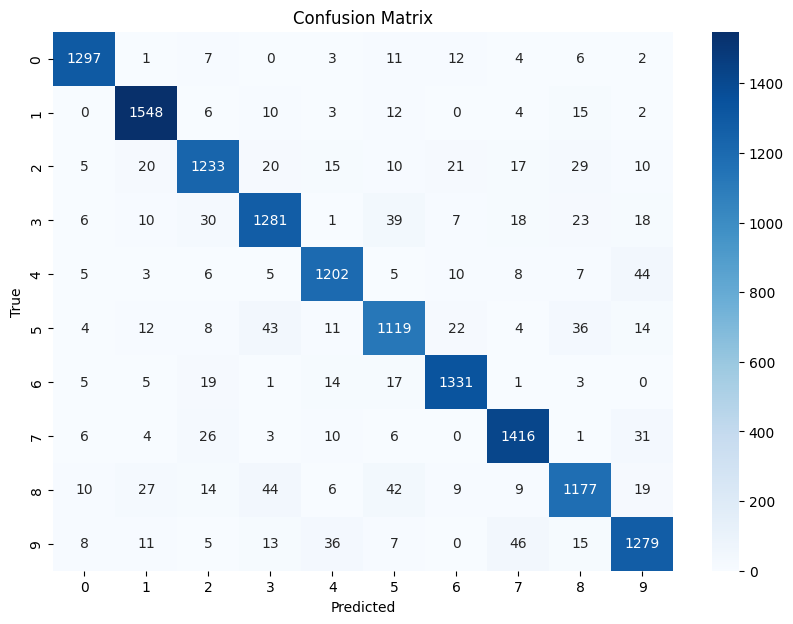

In [23]:
# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

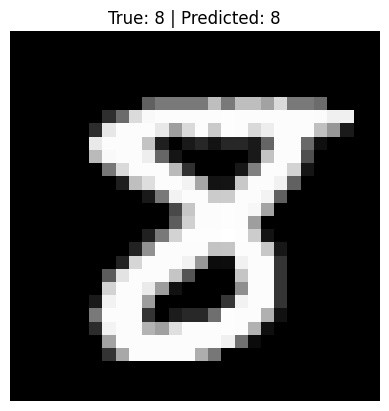

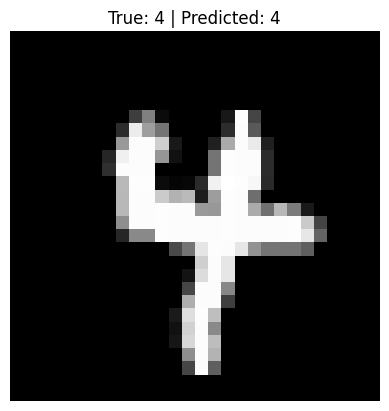

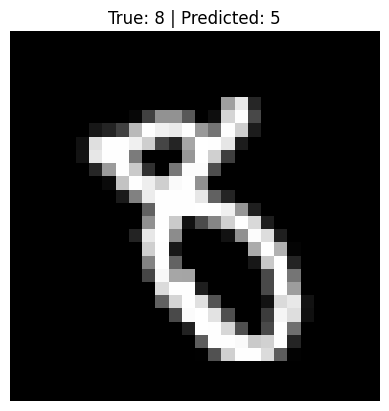

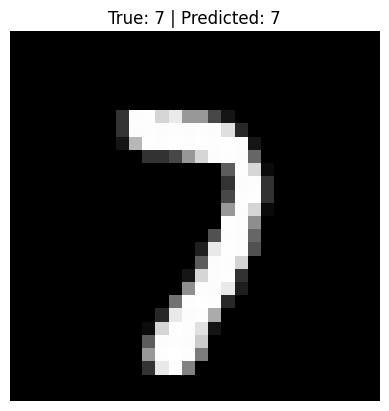

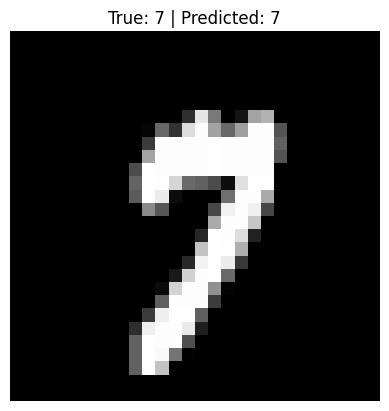

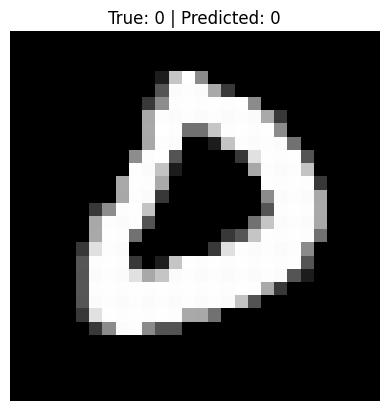

In [24]:
# 6. Visualize a few test samples
for i in range(6):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i]} | Predicted: {y_pred[i]}")
    plt.axis('off')
    plt.show()


Predicting digit from image: /content/image.png


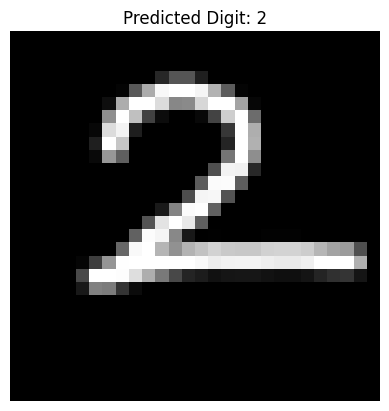

Predicted Digit: 2


In [25]:
# 7. Predict a digit from a custom image
def predict_custom_image(image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = ImageOps.invert(img)                 # Invert colors (white digit on black background)
    img = img.resize((28, 28))                 # Resize to 28x28
    img_array = np.array(img) / 255.0          # Normalize
    img_flat = img_array.flatten().reshape(1, -1)  # Flatten and reshape for model

    prediction = model.predict(img_flat)[0]
    plt.imshow(img_array, cmap='gray')
    plt.title(f"Predicted Digit: {prediction}")
    plt.axis('off')
    plt.show()
    return prediction

#  Replace this with your image path
image_path = "/content/image.png"  # <-- CHANGE THIS
print("\nPredicting digit from image:", image_path)
predicted_digit = predict_custom_image(image_path)
print("Predicted Digit:", predicted_digit)



Predicting digit from image: /content/Image3.png


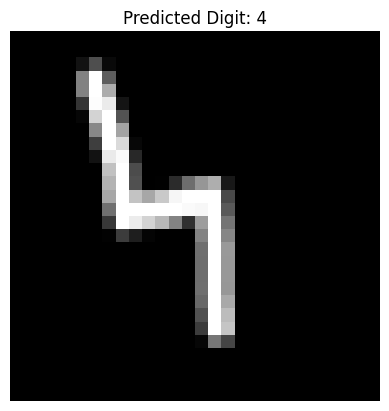

Predicted Digit: 4


In [26]:
#  Replace this with your image path
image_path = "/content/Image3.png"  # <-- CHANGE THIS
print("\nPredicting digit from image:", image_path)
predicted_digit = predict_custom_image(image_path)
print("Predicted Digit:", predicted_digit)


Predicting digit from image: /content/Image1.png


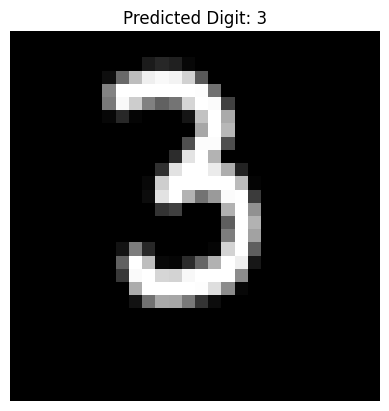

Predicted Digit: 3


In [27]:
#  Replace this with your image path
image_path = "/content/Image1.png"  # <-- CHANGE THIS
print("\nPredicting digit from image:", image_path)
predicted_digit = predict_custom_image(image_path)
print("Predicted Digit:", predicted_digit)


Predicting digit from image: /content/Image4.png


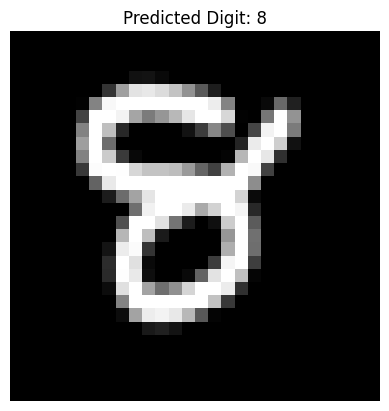

Predicted Digit: 8


In [28]:
#  Replace this with your image path
image_path = "/content/Image4.png"  # <-- CHANGE THIS
print("\nPredicting digit from image:", image_path)
predicted_digit = predict_custom_image(image_path)
print("Predicted Digit:", predicted_digit)

In [29]:
import joblib

# Save model to file
joblib.dump(model, "mnist_logistic_model.pkl")

# To download the file from Colab
from google.colab import files
files.download("mnist_logistic_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>